In [28]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
from pathlib import Path
import pandas as pd
import numpy as np
from PIL import Image

In [29]:
# always use relative path
p=Path("Train/Images/")

In [30]:
dirc=p.glob('*.jpg')

In [31]:
all_files = [str(d) for d in dirc]
#print(all_files)

In [32]:
# always use relative path
df=pd.read_csv("Train/train.csv")
print(df.head())
print(df.shape)
data=df.values
print(data.shape)

   ImageId NameOfPokemon
0  296.jpg       Pikachu
1  297.jpg       Pikachu
2  298.jpg       Pikachu
3  299.jpg       Pikachu
4  300.jpg       Pikachu
(304, 2)
(304, 2)


In [33]:
X=data[:,0]
Y=data[:,1]
image_data=[]
labels_dict={'Pikachu':0,'Bulbasaur':1,'Charmander':2}

labels=[]
#  if we dont scale down images, it will take longer time to process
for d in all_files:
    img=image.load_img(d, target_size=(32,32))
    img_array=image.img_to_array(img)
    image_data.append(img_array)

In [34]:
len(image_data)

304

In [35]:
for i in range(X.shape[0]):
    label=Y[i]
    labels.append(labels_dict[label])
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [36]:
labels=np.array(labels)
print(labels.shape)
print(len(image_data))

(304,)
304


In [37]:
#print(image_data[3])

In [38]:
print(image_data[3].shape)

(32, 32, 3)


In [39]:
Y=np.array(labels)
X=np.array(image_data)
print(Y.shape)
print(X.shape)

(304,)
(304, 32, 32, 3)


In [40]:
def drawImg(img,label):
    plt.imshow(img)
    key=[]
    for x in labels_dict:
        if labels_dict[x] == int(label):
            key.append(x)
    plt.title(*key)
  #  plt.legend()
    plt.axis('off')
    plt.show()

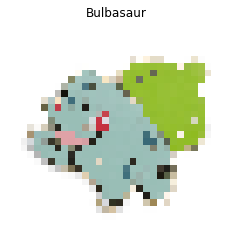

In [41]:
drawImg(X[192]/255.,Y[192])

In [42]:
print(labels_dict['Pikachu'])

0


In [43]:
key=[]
for x in labels_dict:
    if labels_dict[x] is 0:
        key.append(x)
print(key)

['Pikachu']


In [44]:
print(*key)

Pikachu


In [45]:
# You have not normalise X data 
# X = X/255.

In [46]:
#  Now its fine...
#  oh wait.. 
#  do we need to normalise data for knn?
#  i guess its not mandatory
X.shape

(304, 32, 32, 3)

# KNN AlGORITHM

In [47]:
# euclid distance
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
def kNN(x,y,query_point,k=5):
    m=x.shape[0]
    val=[]
    for i in range(m):
        d=distance(query_point,x[i])
        val.append((d,y[i]))
    val=sorted(val)
    val=val[:k]
    val=np.array(val)
    new_val=np.unique(val[:,1],return_counts=True)
    index=new_val[1].argmax()
    pred=new_val[0][index]
    return pred 

In [48]:
print(X.shape)

(304, 32, 32, 3)


In [49]:
print(Y.shape)

(304,)


In [50]:
x=X.reshape((X.shape[0],-1))
print(x.shape)

(304, 3072)


In [51]:
# See, here you are predicting label for image 300,,,,
#  but you dont have to predict images on which you have traind
# instead read images from pokemon_test folder and predict label for each of the images
# but condtion is you dont have to predict labels in the same order the images are in 
# means dont predict for 1100 first then 1101, 1102 till 1240
# bcoz when you will read files from glob(*.jpg) it will read serial wise...

# understand now?yes , i have to submit this tst.csv with predictions in it??

# yes and predictions wont be labels like 0,1,2 it should be Name of Pokemon

# clear?
# cool, yes everything is clear now .... great ;-) 
# leave it like this .... lol
#  u want to make new dataset of chat..? :-p
# Haha  yess ofc, theese are memories of learning this XD
# Insane
# lol
val=int(kNN(x,Y,x[300]))
#drawImg(X[0],Y[0])
print(val)

2


In [52]:
print(Y[300])
print(x[300].shape)

2
(3072,)


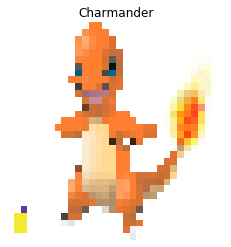

In [53]:
drawImg(X[300]/255.0,Y[300])

In [54]:
# ye testing wala u can remove... kch kaam ni krra ye :-p sureee kl ton m ye dobara krungi wsebhi XD
#  nice.g

# Testing

In [56]:
#df=pd.read_csv(r'C:\Users\ayush\Desktop\pokemon_test\test.csv')
print(df.head())

   ImageId NameOfPokemon
0  296.jpg       Pikachu
1  297.jpg       Pikachu
2  298.jpg       Pikachu
3  299.jpg       Pikachu
4  300.jpg       Pikachu


In [57]:
image_data=[]
p=Path(r'C:\Users\ayush\Desktop\pokemon_test\Images')
dirc=p.glob('*')
image_list=[str(d) for d in dirc]
#print(len(image_list))
#print(image_list[1])
#print(image_list[1][-8:])
image_dict={} # mapping between the image  address and the image id
for j in range(len(image_list)):
  #  image_dict[image_list[j]]=image_list[j][-8:]
    image_dict[image_list[j][-8:]]=image_list[j]


In [58]:
print(len(image_dict))

0


In [59]:
# converting into array
for d in image_list:
    img=image.load_img(d, target_size=(128,128))
    img_array=image.img_to_array(img)
    image_data.append(img_array)

In [60]:
image_data=np.array(image_data)
print(image_data.shape)

(0,)


In [61]:
query_point=image_data.reshape((image_data.shape[0],-1))
print(query_point.shape)

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [62]:
val=int(kNN(x,Y,query_point[2]))
#drawImg(X[0],Y[0])
print(val)

NameError: name 'query_point' is not defined

In [63]:
df=df.values
print(df.shape[0])
print(*df[1])   


304
297.jpg Pikachu


In [64]:
image_data=[]
for i in range(df.shape[0]):
    d=image_dict[str(*df[i])]
    img=image.load_img(d, target_size=(128,128))
    img_array=image.img_to_array(img)
    img_array=img_array.reshape((img_array.shape[0],-1))
    
    

TypeError: decoding str is not supported

In [65]:
print(str(*df[2]))

TypeError: decoding str is not supported

In [66]:
print(len(image_data))

0


In [67]:
x=np.array(image_data)
x=x.reshape((x.shape[0],-1))
print(x.shape)

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

## Testing Starts from here

In [74]:
# always use relative path
p=Path("Test/Images/")

In [75]:
dirc=p.glob('*.jpg')

In [76]:
test_images = [str(d) for d in dirc]
#print(all_files)

In [77]:
#  Not in this order 
test_images[:10]

['Test\\Images\\1100.jpg',
 'Test\\Images\\1101.jpg',
 'Test\\Images\\1102.jpg',
 'Test\\Images\\1103.jpg',
 'Test\\Images\\1104.jpg',
 'Test\\Images\\1105.jpg',
 'Test\\Images\\1106.jpg',
 'Test\\Images\\1107.jpg',
 'Test\\Images\\1108.jpg',
 'Test\\Images\\1109.jpg']

In [68]:
test_df  = pd.read_csv("Test/test.csv")

In [69]:
# Now we have to read images in this order 1106 , 2236,1131,2221
test_df = test_df.values

In [70]:
test_df = test_df.reshape(test_df.shape[0])

In [71]:
#  yeaah fine.... 
#  now iterate over test_df and read images in this order

In [72]:
# path should be correct
#  It is "Test/Images/1103.jpg"
all_test_images = []
for d in test_df:
    print(d)
    img=image.load_img("Test/Images/"+d, target_size=(32,32))
    img_array=image.img_to_array(img)
    all_test_images.append(img_array)

1106.jpg
2236.jpg
1131.jpg
2221.jpg
2011.jpg
2030.jpg
2035.jpg
1110.jpg
1104.jpg
2217.jpg
1111.jpg
1100.jpg
1112.jpg
1138.jpg
2238.jpg
2009.jpg
2225.jpg
2240.jpg
2020.jpg
2209.jpg
2029.jpg
1114.jpg
2201.jpg
1118.jpg
2025.jpg
2202.jpg
1117.jpg
1119.jpg
2000.jpg
2007.jpg
2039.jpg
2017.jpg
2215.jpg
1120.jpg
2006.jpg
1116.jpg
1128.jpg
1125.jpg
2203.jpg
1133.jpg
1137.jpg
2220.jpg
2012.jpg
2224.jpg
2206.jpg
1122.jpg
2223.jpg
1102.jpg
2234.jpg
2216.jpg
2016.jpg
2227.jpg
2013.jpg
1113.jpg
2204.jpg
1101.jpg
2208.jpg
2024.jpg
2031.jpg
2222.jpg
2211.jpg
2033.jpg
2213.jpg
2231.jpg
2001.jpg
2040.jpg
1127.jpg
2023.jpg
2015.jpg
1121.jpg
2232.jpg
1139.jpg
1103.jpg
2018.jpg
2233.jpg
2212.jpg
2210.jpg
2228.jpg
2026.jpg
1132.jpg
2003.jpg
1129.jpg
2214.jpg
1123.jpg
2004.jpg
1136.jpg
1140.jpg
2226.jpg
2230.jpg
1135.jpg
1105.jpg
2237.jpg
1109.jpg
2022.jpg
2005.jpg
2218.jpg
2036.jpg
1115.jpg
2032.jpg
2200.jpg
1134.jpg
1130.jpg
1107.jpg
2034.jpg
2205.jpg
2008.jpg
2027.jpg
2028.jpg
2239.jpg
1108.jpg
2010.jpg
2

In [73]:
# all_test_images this loaded all the testing images in the desired sequence, that was important
#  now we will iterate over this all_test_images and predict label for each of the images and save
#  to y_pred list

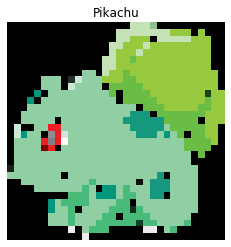

In [74]:
#  wow intelligent ;-) lol lesser than u.. speechless XD
drawImg(all_test_images[40]/255.,0)

In [75]:
p=int(kNN(x,Y,all_test_images[40].reshape(1,3072)))

IndexError: too many indices for array

In [ ]:
print(p)
#  wow correct on the test data ;-) party XD,
# let's complete first sure

In [ ]:
labels_to_names={0:'Pikachu', 1 : 'Bulbasaur' , 2 : 'Charmander'}

In [ ]:
# i hope you understand why i m making a opposite dictionary
#  bcoz predictions are in 0,1,2 but we want actual names  yes yes understood

In [ ]:
all_test_images = np.array(all_test_images)

In [ ]:
all_test_images = all_test_images.reshape((all_test_images.shape[0],-1))

In [ ]:
all_test_images.shape

In [ ]:
y_pred = []
for i in all_test_images:
    p=int(kNN(x,Y,i))
    y_pred.append(labels_to_names[p])

In [ ]:
#  wowo all your prediction yeah lets check accuracy XD
#  but its giving pikachu for every test sample. lol
#  lets restart the kernel, somewhere error.okkk
#  now working fine...
#  did you get what was the problem? but we were reshaping already...
#  even i do not know what was the prob.. sometimes restarting kernel works all fine :-p  lol my logic 
# actually u r right, i have experienced this too
y_pred

In [ ]:
test_df

In [ ]:
#  we have 2 array test_df containing img_id and y_pred containing prediction names
# now merge them both, in the format like submission file  ok
# we can use np.stack for this ---> yes

In [ ]:
result = np.stack((test_df, y_pred), axis=1)

In [ ]:
#  see all good na ;-)  osmm
result[:20]

In [ ]:
# now we have to make a .csv file of this result
#  but we cant do with numpy array
#  so we will use pandas library

In [ ]:
import pandas as pd

In [ ]:
result_df = pd.DataFrame(result,columns=["ImageId","NameOfPokemon"])

In [76]:
# bcoz heading shoudl be imageid and Nameofpokemon... case sensitive 

In [77]:
# woahh woahhhh.. got it yes omg its beautiful!!!! yes it is..
result_df.head()

NameError: name 'result_df' is not defined

In [78]:
#  now make a csv file for this result_df

In [79]:
#  find out why index=False written because we dont want 
result_df.to_csv("prediction_k_13.csv", index=False)

NameError: name 'result_df' is not defined

In [80]:
#  now upload these 3 oki m 